# Software Developer Salary Prediction
## AI Capstone Project  
Team 23

- 19K41A05E9
- 19K41A05E7
- 20K45A0215

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
pd.set_option('display.max_columns', None) # for displaying all columns
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-employed",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",18 - 24 years,"Coding Bootcamp;Other online resources (ex: videos, blogs, etc)",NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Google it,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);School",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);Online Forum",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;Visual Studio Code,IPython/Jupyter;RStudio;Sublime Text;Visual Studio Code,MacOS,Visit Stack Overflow;Google it;Watch help / tutorial videos;Do other work and come back later,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-employed",United Kingdom,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applicatio

In [3]:
# input features
df = df[["Country",
         "EdLevel",
         "YearsCodePro",
         "Employment",
         "ConvertedCompYearly",
         "DevType",
         "LanguageHaveWorkedWith",
         "MiscTechHaveWorkedWith",
         "WebframeHaveWorkedWith"]]

In [4]:
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,DevType,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,WebframeHaveWorkedWith
0,Slovakia,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,"Independent contractor, freelancer, or self-employed",62268.0,"Developer, mobile",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,NaN,Laravel;Symfony
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN,NaN,JavaScript;Python,Cordova,Angular;Flask;Vue.js
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN,NaN,Assembly;C;Python;R;Rust,NumPy;Pandas;TensorFlow;Torch/PyTorch,Flask
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN,"Developer, front-end",JavaScript;TypeScript,NaN,Angular;jQuery
4,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-employed",NaN,"Developer, desktop or enterprise applications;Developer, full-stack;Engineer, data;Other (please specify):",Bash/Shell;HTML/CSS;Python;SQL,Apache Spark;Hadoop;NumPy;Pandas,Flask


In [5]:
# droping null vallues

df = df[df["Salary"].notnull()]
df = df.dropna()
df.isnull().sum()

Country                   0
EdLevel                   0
YearsCodePro              0
Employment                0
Salary                    0
DevType                   0
LanguageHaveWorkedWith    0
MiscTechHaveWorkedWith    0
WebframeHaveWorkedWith    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 12 to 83437
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 21613 non-null  object 
 1   EdLevel                 21613 non-null  object 
 2   YearsCodePro            21613 non-null  object 
 3   Employment              21613 non-null  object 
 4   Salary                  21613 non-null  float64
 5   DevType                 21613 non-null  object 
 6   LanguageHaveWorkedWith  21613 non-null  object 
 7   MiscTechHaveWorkedWith  21613 non-null  object 
 8   WebframeHaveWorkedWith  21613 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.6+ MB


considering only full time employed people and droping the employment column

In [7]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18568 entries, 12 to 83437
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 18568 non-null  object 
 1   EdLevel                 18568 non-null  object 
 2   YearsCodePro            18568 non-null  object 
 3   Salary                  18568 non-null  float64
 4   DevType                 18568 non-null  object 
 5   LanguageHaveWorkedWith  18568 non-null  object 
 6   MiscTechHaveWorkedWith  18568 non-null  object 
 7   WebframeHaveWorkedWith  18568 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.3+ MB


In [8]:
df['Country'].value_counts()

United States of America    4123
India                       1613
United Kingdom              1185
Germany                     1089
Canada                       716
                            ... 
Botswana                       1
Guinea                         1
Madagascar                     1
Benin                          1
Mauritania                     1
Name: Country, Length: 159, dtype: int64

In [9]:
def shorten_categories(categories, cutoff):
    return {
        categories.index[i]: categories.index[i]
        if categories.values[i] >= cutoff
        else 'Other'
        for i in range(len(categories))
    }

In [10]:
country_map = shorten_categories(df.Country.value_counts(), 200)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                       5611
United States of America    4123
India                       1613
United Kingdom              1185
Germany                     1089
Canada                       716
Brazil                       680
France                       560
Australia                    404
Spain                        392
Italy                        378
Netherlands                  374
Sweden                       345
Poland                       304
Russian Federation           291
Turkey                       283
Mexico                       220
Name: Country, dtype: int64

In [11]:
dataset_country = df.Country.value_counts()
pd.DataFrame(dataset_country)
dataset_country.to_csv('countries_shortened.csv')

In [12]:
countries_csv = pd.read_csv('countries_shortened.csv')

countries_csv.rename(columns={'Country': 'Count',
                               'Unnamed: 0': 'Country'}, inplace=True)


In [13]:
import plotly.express as px

fig = px.pie(countries_csv, values='Count', names='Country')
fig.show()

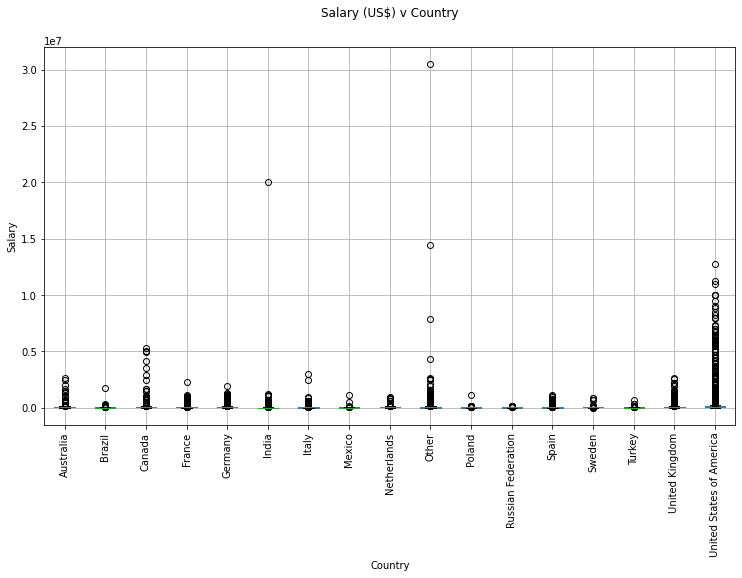

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 8000]
df = df[df['Country'] != 'Other']

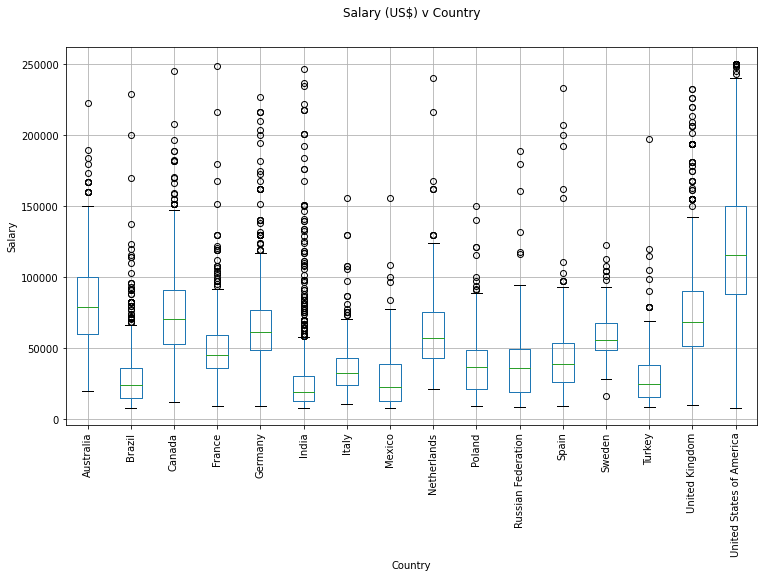

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

---
# Label Encoding
---

In [17]:
df["Country"].unique()
countrylist = df["Country"].unique()
countrylist

array(['Germany', 'Turkey', 'Brazil', 'United Kingdom', 'Italy',
       'Russian Federation', 'Canada', 'Poland', 'Netherlands',
       'United States of America', 'France', 'Australia', 'India',
       'Spain', 'Sweden', 'Mexico'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
countrylist_le = df["Country"].unique()
countrylist_le

array([ 4, 13,  1, 14,  6, 10,  2,  9,  8, 15,  3,  0,  5, 11, 12,  7])

In [19]:
country_dict = dict(zip(countrylist, countrylist_le))

Label Encoded Values and Countries

In [20]:
country_dict

{'Germany': 4,
 'Turkey': 13,
 'Brazil': 1,
 'United Kingdom': 14,
 'Italy': 6,
 'Russian Federation': 10,
 'Canada': 2,
 'Poland': 9,
 'Netherlands': 8,
 'United States of America': 15,
 'France': 3,
 'Australia': 0,
 'India': 5,
 'Spain': 11,
 'Sweden': 12,
 'Mexico': 7}

---
## Label Encoding Experience column
---

In [21]:
df["YearsCodePro"].unique()

array(['6', '2', '15', '12', '16', '3', '10', '8', '17', '14', '1', '5',
       '11', '25', '4', '24', '13', '9', '7', '26', '39', '20', '21',
       '23', '30', '19', 'Less than 1 year', '33', '18', '37', '35', '31',
       '28', '22', '27', '29', '32', '42', '40', '34', '36', '44', '41',
       '50', '38', '47', '43', '45', 'More than 50 years'], dtype=object)

In [22]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [23]:
df["YearsCodePro"].unique()

array([ 6. ,  2. , 15. , 12. , 16. ,  3. , 10. ,  8. , 17. , 14. ,  1. ,
        5. , 11. , 25. ,  4. , 24. , 13. ,  9. ,  7. , 26. , 39. , 20. ,
       21. , 23. , 30. , 19. ,  0.5, 33. , 18. , 37. , 35. , 31. , 28. ,
       22. , 27. , 29. , 32. , 42. , 40. , 34. , 36. , 44. , 41. , 50. ,
       38. , 47. , 43. , 45. ])

---
## Label Encoding: Education Level
---

In [24]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [25]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [26]:
edulevel_list = df["EdLevel"].unique()

In [27]:
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([2, 0, 3, 1])

In [28]:
edulevel_dict = dict(zip(edulevel_list, df["EdLevel"].unique()))
edulevel_dict

{'Master’s degree': 2,
 'Bachelor’s degree': 0,
 'Post grad': 3,
 'Less than a Bachelors': 1}

---
## Label Encoding: Developer Type
---

In [29]:
df.head(2)

,Country,EdLevel,YearsCodePro,Salary,DevType,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,WebframeHaveWorkedWith
12,4,2,6.0,77290.0,"Developer, desktop or enterprise applications;Developer, back-end",C;C++;Java;Perl;Ruby,Qt,Ruby on Rails
16,13,0,2.0,17748.0,"Developer, full-stack",C#;HTML/CSS;Java;JavaScript;Node.js,.NET Core / .NET 5;Flutter,Angular;ASP.NET Core ;Spring


In [30]:
df["DevType"].unique()

array(['Developer, desktop or enterprise applications;Developer, back-end',
       'Developer, full-stack', 'Developer, game or graphics', ...,
       'Developer, mobile;Developer, front-end;Developer, full-stack;Scientist;Developer, game or graphics;Engineering manager;Educator',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator;Developer, QA or test;DevOps specialist;Designer;System administrator;Product manager',
       'Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, embedded applications or devices;Engineering manager;Educator'],
      dtype=object)

In [31]:
def clean_devtype(x):
    if 'back-end' in x:
        return 'Back-End Developer'
    if 'full-stack' in x:
        return 'Full-Stack Developer'
    if 'front-end' in x:
        return 'Front-End Developer'
    if 'Database administrator' in x:
        return 'Database Administrator'
    if 'DevOps specialist' in x:
        return 'DevOps Specialist'
    if 'Product manager' in x:
        return 'Product Manager'
    if 'mobile' in x:
        return 'Mobile Developer'
    if 'game or graphics' in x:
        return 'Gaming/Graphics Developer'
    if 'Data scientist or machine learning specialist' in x:
        return "Data Science/Machine Learning Developer"
    return 'Other'

df['DevType'] = df['DevType'].apply(clean_devtype)

In [32]:
devtype_list = df["DevType"].unique()

In [33]:
le_devtype = LabelEncoder()
df["DevType"] = le_devtype.fit_transform(df['DevType'])
developers = df["DevType"].unique()
df["DevType"].unique()

array([0, 5, 6, 1, 3, 4, 2, 8, 7, 9])

In [34]:
dectypedict = dict(zip(devtype_list, developers))
dectypedict

{'Back-End Developer': 0,
 'Full-Stack Developer': 5,
 'Gaming/Graphics Developer': 6,
 'Data Science/Machine Learning Developer': 1,
 'DevOps Specialist': 3,
 'Front-End Developer': 4,
 'Database Administrator': 2,
 'Other': 8,
 'Mobile Developer': 7,
 'Product Manager': 9}

---
## Label Encoding: Languages
---

In [35]:
df.head(2)

,Country,EdLevel,YearsCodePro,Salary,DevType,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,WebframeHaveWorkedWith
12,4,2,6.0,77290.0,0,C;C++;Java;Perl;Ruby,Qt,Ruby on Rails
16,13,0,2.0,17748.0,5,C#;HTML/CSS;Java;JavaScript;Node.js,.NET Core / .NET 5;Flutter,Angular;ASP.NET Core ;Spring


In [36]:
df["LanguageHaveWorkedWith"].unique()

array(['C;C++;Java;Perl;Ruby', 'C#;HTML/CSS;Java;JavaScript;Node.js',
       'Assembly;C;C#;C++;HTML/CSS;Java;JavaScript;Matlab;Node.js;SQL',
       ..., 'Bash/Shell;F#;HTML/CSS;JavaScript;Node.js;SQL',
       'Bash/Shell;C#;C++;Go;Groovy;HTML/CSS;Java;JavaScript;Kotlin;Node.js;PHP;Python;Scala;SQL;TypeScript',
       'Bash/Shell;Node.js;TypeScript'], dtype=object)

In [37]:
def clean_LanguageHaveWorkedWith(x):
    if 'C' in x or 'C++' in x:
        return 'C/C++'
    if 'Java' in x:
        return 'Java'
    if 'Python' in x or 'Go' in x:
        return 'Python, Go'
    if 'HTML' in x or 'CSS' in x or 'JavaScript' in x or 'Node.js' in x:
        return 'HTML/CSS, JavaScript, Node.js'
    if 'Kotlin' in x or 'Swift' in x:
        return 'Kotlin, Swift'
    return 'Other'

df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].apply(clean_LanguageHaveWorkedWith)

In [38]:
language_list = df["LanguageHaveWorkedWith"].unique()

In [39]:
le_languges = LabelEncoder()
df['LanguageHaveWorkedWith'] = le_languges.fit_transform(df['LanguageHaveWorkedWith'])
df["LanguageHaveWorkedWith"].unique()
language_list_le = df["LanguageHaveWorkedWith"].unique()


In [40]:
language_dict = dict(zip(language_list, language_list_le))

In [41]:
language_dict

{'C/C++': 0,
 'Python, Go': 5,
 'Java': 2,
 'Kotlin, Swift': 3,
 'Other': 4,
 'HTML/CSS, JavaScript, Node.js': 1}

---
## Label Encoding: technology worked with
---

In [42]:
df.head(2)

,Country,EdLevel,YearsCodePro,Salary,DevType,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,WebframeHaveWorkedWith
12,4,2,6.0,77290.0,0,0,Qt,Ruby on Rails
16,13,0,2.0,17748.0,5,0,.NET Core / .NET 5;Flutter,Angular;ASP.NET Core ;Spring


In [43]:
df['MiscTechHaveWorkedWith'].unique()

array(['Qt', '.NET Core / .NET 5;Flutter',
       '.NET Framework;.NET Core / .NET 5;Qt', '.NET Core / .NET 5',
       'NumPy;Pandas', '.NET Framework;.NET Core / .NET 5',
       'NumPy;Pandas;Torch/PyTorch',
       '.NET Framework;.NET Core / .NET 5;Apache Spark;Flutter;React Native',
       'Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch',
       'Apache Spark;Hadoop;Keras;NumPy;Pandas;TensorFlow',
       'React Native', '.NET Framework',
       'Flutter;React Native;TensorFlow', 'NumPy;Pandas;React Native',
       '.NET Framework;Qt', 'NumPy;React Native;Torch/PyTorch',
       'Keras;NumPy;Pandas;TensorFlow',
       '.NET Framework;.NET Core / .NET 5;Apache Spark;Hadoop;Keras;Pandas;Qt;TensorFlow;Torch/PyTorch',
       'Cordova;Flutter', 'Cordova;React Native', 'Cordova;Qt',
       'NumPy;TensorFlow;Torch/PyTorch', 'Cordova', 'Flutter',
       '.NET Framework;.NET Core / .NET 5;NumPy;Pandas;Qt',
       '.NET Framework;.NET Core / .NET 5;Flutter;React Native',
       '.NET Framework;.NE

In [44]:
def clean_MiscTechHaveWorkedWith(x):
    if 'Keras' in x or 'NumPy' in x or 'Pandas' in x or 'TensorFlow' in x or 'Torch/PyTorch' in x:
        return 'Machine Learning (NumPy, Pandas, TensorFlow, Keras, etc.)'
    
    if 'Apache Spark' in x or 'Hadoop' in x:
        return 'Apache Spark, Hadoop'
    
    if '.NET 5' in x or '.NET Framework' in x or '.NET Core' in x:
        return '.NET Framework'
    
    if 'React Native' in x or 'Flutter' in x:
        return 'React Native/Flutter'

    return 'Other'


df['MiscTechHaveWorkedWith'] = df['MiscTechHaveWorkedWith'].apply(clean_MiscTechHaveWorkedWith)

In [45]:
tech_list = df["MiscTechHaveWorkedWith"].unique()
tech_list

array(['Other', '.NET Framework',
       'Machine Learning (NumPy, Pandas, TensorFlow, Keras, etc.)',
       'Apache Spark, Hadoop', 'React Native/Flutter'], dtype=object)

In [46]:
le_misctech = LabelEncoder()
df['MiscTechHaveWorkedWith'] = le_misctech.fit_transform(df['MiscTechHaveWorkedWith'])
tech_list_le = df["MiscTechHaveWorkedWith"].unique()
tech_list_le

array([3, 0, 2, 1, 4])

In [47]:
tech_list_dict = dict(zip(tech_list, tech_list_le))
tech_list_dict

{'Other': 3,
 '.NET Framework': 0,
 'Machine Learning (NumPy, Pandas, TensorFlow, Keras, etc.)': 2,
 'Apache Spark, Hadoop': 1,
 'React Native/Flutter': 4}

---
## Label Encoding: Webframe
---

In [48]:
df.head(2)

,Country,EdLevel,YearsCodePro,Salary,DevType,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,WebframeHaveWorkedWith
12,4,2,6.0,77290.0,0,0,3,Ruby on Rails
16,13,0,2.0,17748.0,5,0,0,Angular;ASP.NET Core ;Spring


In [49]:
df['WebframeHaveWorkedWith'].unique()

array(['Ruby on Rails', 'Angular;ASP.NET Core ;Spring', 'jQuery', ...,
       'Django;FastAPI;Laravel', 'Django;Laravel;React.js',
       'Flask;React.js;Ruby on Rails;Vue.js'], dtype=object)

In [50]:
def clean_WebframeHaveWorkedWith(x):
    if 'Ruby on Rails' in x:
        return 'Ruby on Rails'
     
    if 'jQuery' in x or 'Express' in x:
        return 'jQuery/Express'
    
    if 'React.js' in x or 'Spring' in x or 'Vue.js' in x or 'Gatsby' in x:
        return 'React.js/Spring/Vue.js/Gatsby'
    
    if 'Django' in x:
        return 'Django/Flask'
    
    if 'Angular' in x or 'Angular.js' in x:
        return 'Angular/Angular.js'

    return 'Other'


df['WebframeHaveWorkedWith'] = df['WebframeHaveWorkedWith'].apply(clean_WebframeHaveWorkedWith)

In [51]:
webframe_list = df['WebframeHaveWorkedWith'].unique()
webframe_list

array(['Ruby on Rails', 'React.js/Spring/Vue.js/Gatsby', 'jQuery/Express',
       'Other', 'Django/Flask', 'Angular/Angular.js'], dtype=object)

In [52]:
le_WebframeHaveWorkedWith = LabelEncoder()
df['WebframeHaveWorkedWith'] = le_WebframeHaveWorkedWith.fit_transform(df['WebframeHaveWorkedWith'])
webframe_list_le = df["WebframeHaveWorkedWith"].unique()
webframe_list_le

array([4, 3, 5, 2, 1, 0])

In [53]:
webframe_list_dict = dict(zip(webframe_list, webframe_list_le))

In [54]:
webframe_list_dict

{'Ruby on Rails': 4,
 'React.js/Spring/Vue.js/Gatsby': 3,
 'jQuery/Express': 5,
 'Other': 2,
 'Django/Flask': 1,
 'Angular/Angular.js': 0}

In [55]:
df.head(2)

,Country,EdLevel,YearsCodePro,Salary,DevType,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,WebframeHaveWorkedWith
12,4,2,6.0,77290.0,0,0,3,4
16,13,0,2.0,17748.0,5,0,0,3


# Model Training

In [56]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [57]:
X.head()

,Country,EdLevel,YearsCodePro,DevType,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,WebframeHaveWorkedWith
12,4,2,6.0,0,0,3,4
16,13,0,2.0,5,0,0,3
33,13,0,2.0,6,0,0,5
45,1,0,15.0,0,0,0,3
55,14,2,12.0,5,0,2,3


In [58]:
df.to_csv("label_encoded_data.csv", index=False)

# Model Trainig using Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred_via_linear_reg = linear_reg.predict(X)

error_linear_reg = np.sqrt(mean_squared_error(y, y_pred_via_linear_reg))
error_linear_reg

40860.31575159337

In [61]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_via_linear_reg)

0.34537960662998435

# Model Training Using Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

y_pred_via_DTR = dec_tree_reg.predict(X)
errorDTR = np.sqrt(mean_squared_error(y, y_pred_via_DTR))
print("RMS Error: {:,.02f}".format(errorDTR))
print("R2 Score: ", r2_score(y, y_pred_via_DTR))

RMS Error: 16,053.30
R2 Score:  0.898955024347227


# Model Trainig using Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)
y_pred_via_RFG = random_forest_reg.predict(X)

error_via_RFG = np.sqrt(mean_squared_error(y, y_pred_via_RFG))
print("RMS Error: {:,.02f}".format(error_via_RFG))

from sklearn.metrics import r2_score
print(r2_score(y, y_pred_via_RFG))

RMS Error: 18,818.96
0.8611399136961158


# using Logistic Regression

In [64]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y.values)

LogisticRegression()

In [65]:
y_pred_via_LG = log_reg.predict(X)
error_via_LG = np.sqrt(mean_squared_error(y, y_pred_via_LG))
print("RMS Error: {:,.02f}".format(error_via_LG))

from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y, y_pred_via_LG))

RMS Error: 45,731.06
R2 Score:  0.18000996614230957


In [66]:
comparative_analysis = {
    'Model' : ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'LogisticRegression'],
    'Root Mean Square Error' : [error_linear_reg, errorDTR, error_via_RFG, error_via_LG],
    'Mean Square Error' : [mean_squared_error(y, y_pred_via_linear_reg), mean_squared_error(y, y_pred_via_DTR), mean_squared_error(y, y_pred_via_RFG), mean_squared_error(y, y_pred_via_LG)],
    'Mean Absolute Error' : [mean_absolute_error(y, y_pred_via_linear_reg), mean_absolute_error(y, y_pred_via_DTR), mean_absolute_error(y, y_pred_via_RFG), mean_absolute_error(y, y_pred_via_LG)],
    'Accuracy' : [r2_score(y, y_pred_via_linear_reg), r2_score(y, y_pred_via_DTR), r2_score(y, y_pred_via_RFG), r2_score(y, y_pred_via_LG)]
}

comparative_analysis_df = pd.DataFrame(comparative_analysis)
comparative_analysis_df.to_excel('comparative_analysis.xlsx', index=False)
comparative_analysis_df

,Model,Root Mean Square Error,Mean Square Error,Mean Absolute Error,Accuracy
0,LinearRegression,40860.315752,1.669565e+09,31652.981739,0.345380
1,DecisionTreeRegressor,16053.299742,2.577084e+08,7080.333841,0.898955
2,RandomForestRegressor,18818.962134,3.541533e+08,12194.827125,0.861140
3,LogisticRegression,45731.057050,2.091330e+09,33647.410699,0.180010


In [67]:
comparative_analysis_df['Accuracy'].max()

best_model = comparative_analysis_df[comparative_analysis_df.Accuracy == comparative_analysis_df.Accuracy.max()]

In [68]:
best_model

,Model,Root Mean Square Error,Mean Square Error,Mean Absolute Error,Accuracy
1,DecisionTreeRegressor,16053.299742,2.577084e+08,7080.333841,0.898955


In [69]:
actual_pred_dataframe  = pd.DataFrame({'Actual': y, 'Predicted Values': y_pred_via_DTR,})
actual_pred_dataframe

,Actual,Predicted Values
12,77290.0,77290.000000
16,17748.0,17748.000000
33,11832.0,11832.000000
45,60480.0,60480.000000
55,64630.0,64630.000000
...,...,...
83401,70000.0,78454.181818
83420,35672.0,35672.000000
83428,41232.0,41232.000000
83432,80169.0,80169.000000


In [70]:
import matplotlib.pyplot as plt
 
# creating the dataset
data = {'Linear Regression': error_linear_reg,
        'Decision Tree': errorDTR,
        'Random Forest': error_via_RFG,
        'Logistic Regression': error_via_LG}

model = list(data.keys())
RMSEerrors = list(data.values())

Text(0.5, 1.0, 'RMS Error for Different Models')

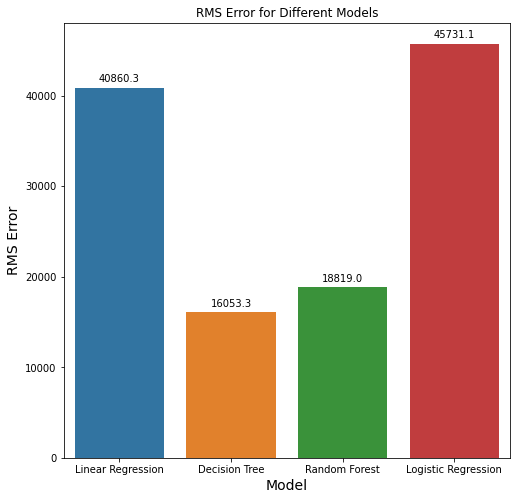

In [71]:
import seaborn as sns
plt.figure(figsize=(8, 8))
splot=sns.barplot(x= model,
                  y= RMSEerrors)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Model", size=14)
plt.ylabel("RMS Error", size=14)
plt.title("RMS Error for Different Models")

In [72]:
accuracy_data = {
        'Linear Regression': r2_score(y, y_pred_via_linear_reg),
        'Decision Tree': r2_score(y, y_pred_via_DTR),
        'Random Forest': r2_score(y, y_pred_via_RFG),
        'Logistic Regression': r2_score(y, y_pred_via_LG)
}

Text(0.5, 1.0, 'Accuracy for Different Moodel')

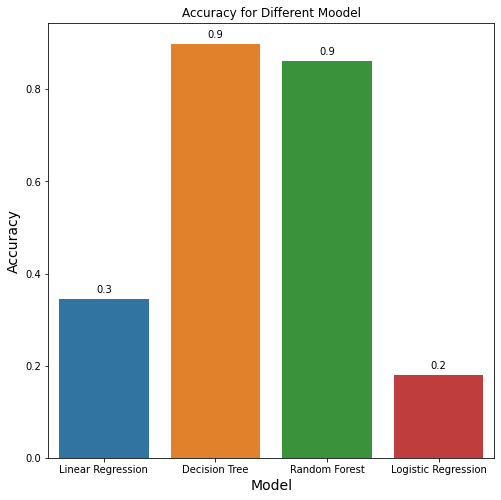

In [73]:
plt.figure(figsize=(8, 8))
splot=sns.barplot(x= list(accuracy_data.keys()),
                  y= list(accuracy_data.values()))

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Model", size=14)
plt.ylabel("Accuracy", size=14)
plt.title("Accuracy for Different Moodel")

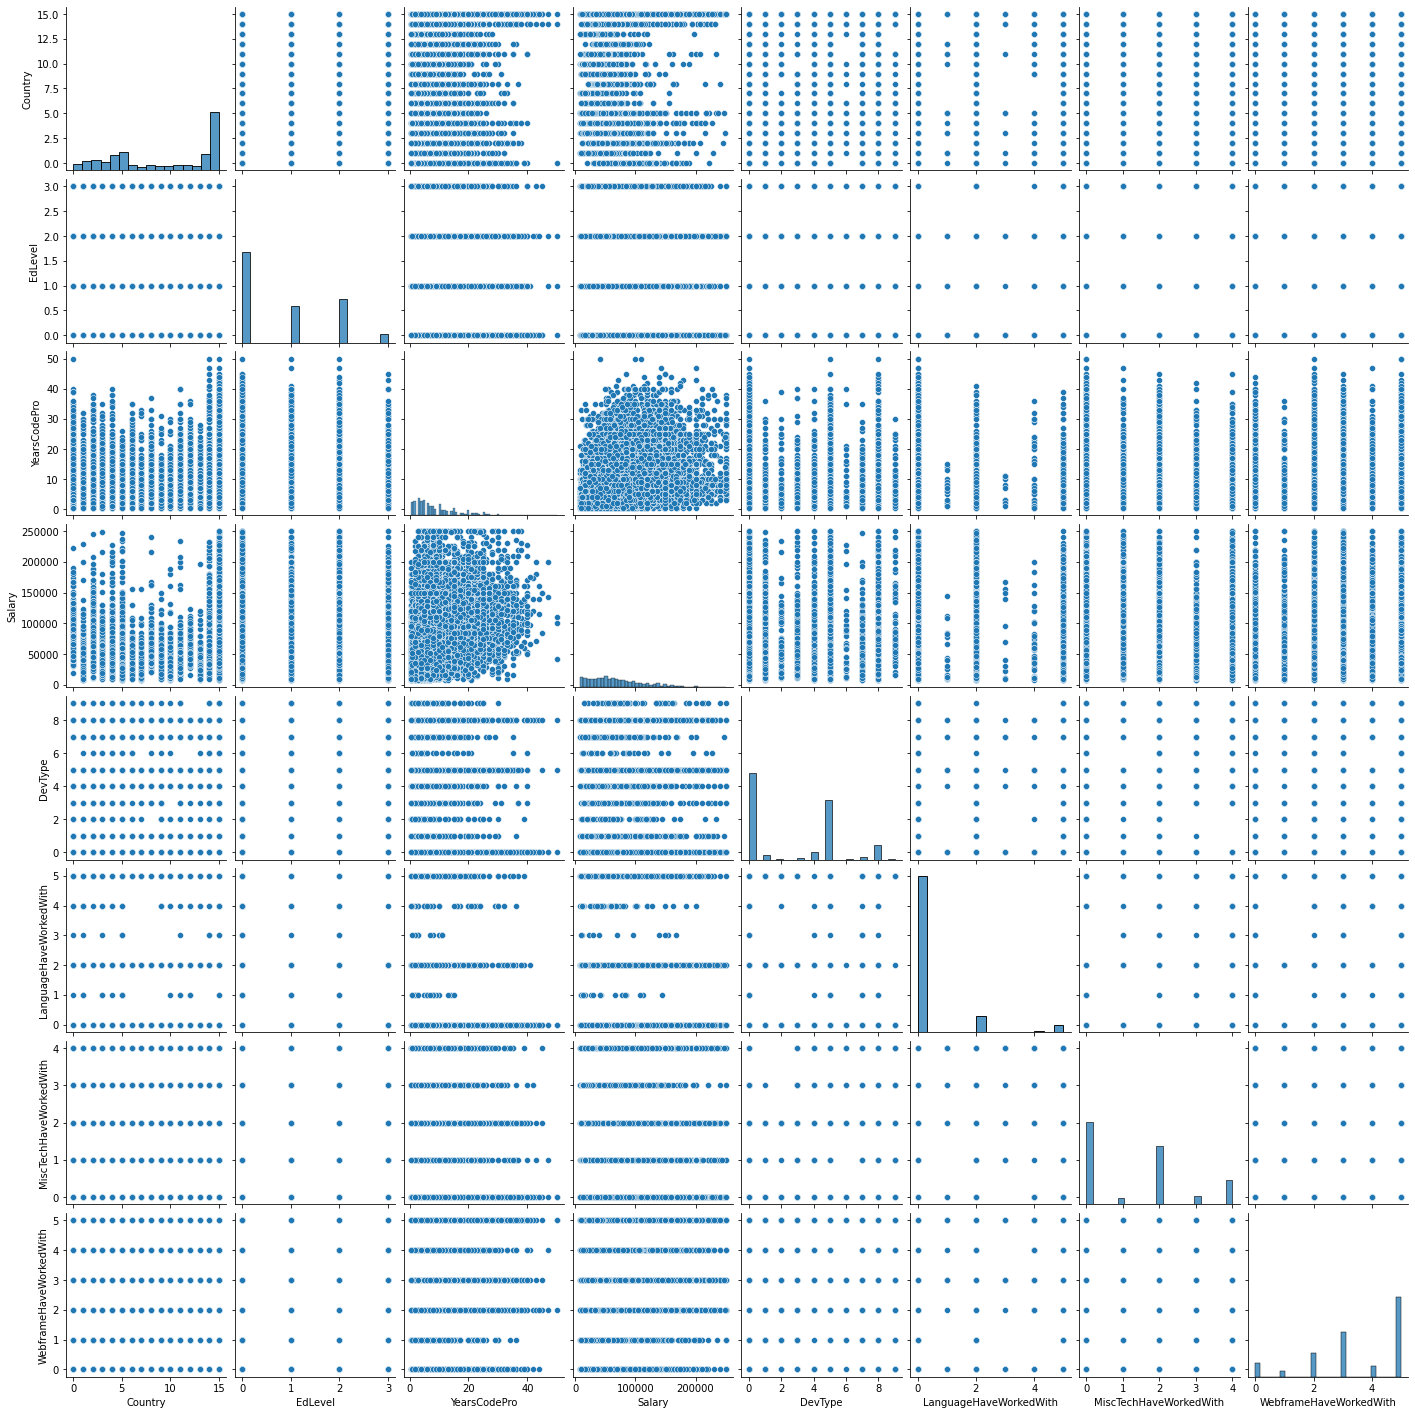

In [74]:
sns.pairplot(df)

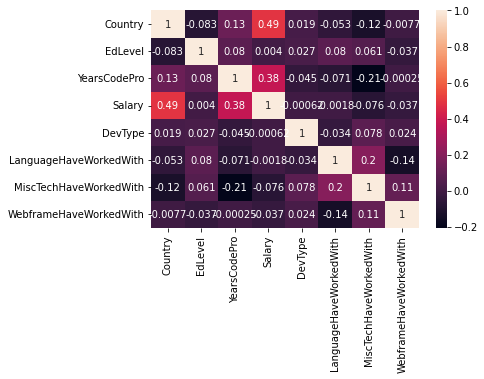

In [75]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [76]:
X.head()

,Country,EdLevel,YearsCodePro,DevType,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,WebframeHaveWorkedWith
12,4,2,6.0,0,0,3,4
16,13,0,2.0,5,0,0,3
33,13,0,2.0,6,0,0,5
45,1,0,15.0,0,0,0,3
55,14,2,12.0,5,0,2,3


In [77]:
import pickle
pickle.dump(dec_tree_reg, open("DevSalaryPredDTR.model", 'wb'))

In [78]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [79]:
regressor = DecisionTreeRegressor()
regressor.fit(X.head(20), y.head(20).values)

DecisionTreeRegressor()

In [80]:
dot_data = export_graphviz(regressor, filled=True, rounded=True,
                                    feature_names=[
                                        'Country',
                                        'EdLevel',
                                        'YearsCodePro',
                                        'DevType',
                                        'LanguageHaveWorkedWith',
                                        'MiscTechHaveWorkedWith',
                                        'WebframeHaveWorkedWith'],
                                    out_file=None,)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [81]:
X.head()

,Country,EdLevel,YearsCodePro,DevType,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,WebframeHaveWorkedWith
12,4,2,6.0,0,0,3,4
16,13,0,2.0,5,0,0,3
33,13,0,2.0,6,0,0,5
45,1,0,15.0,0,0,0,3
55,14,2,12.0,5,0,2,3
